<a href="https://colab.research.google.com/github/Tavuencas/BR_Futebol/blob/main/BR_league_matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
df=pd.read_csv ('/content/drive/MyDrive/0. Portifolio - Data Analysis/SQL & Power BI & Python/BR futebol/Brasileirao_Matches.csv')

In [189]:
df.head()

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1


In [190]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['date'] = df['datetime'].dt.date

df['time'] = df['datetime'].dt.time

df.drop(columns=['datetime'], inplace=True)

df.head()

,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round,date,time
0,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1,2012-05-19,18:30:00
1,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1,2012-05-19,18:30:00
2,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1,2012-05-19,21:00:00
3,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1,2012-05-20,16:00:00
4,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1,2012-05-20,16:00:00


In [191]:
df['winner_team'] = df.apply(lambda row: 'Draw' if row['home_goal'] == row['away_goal'] else (row['home_team'] if row['home_goal'] > row['away_goal'] else row['away_team']), axis=1)

df = df[~df['date'].astype(str).str.contains('2022')]
df = df.reset_index(drop=True)

df.head()

,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round,date,time,winner_team
0,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1,2012-05-19,18:30:00,Draw
1,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1,2012-05-19,18:30:00,Draw
2,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1,2012-05-19,21:00:00,Figueirense-SC
3,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1,2012-05-20,16:00:00,Atletico-MG
4,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1,2012-05-20,16:00:00,Fluminense-RJ


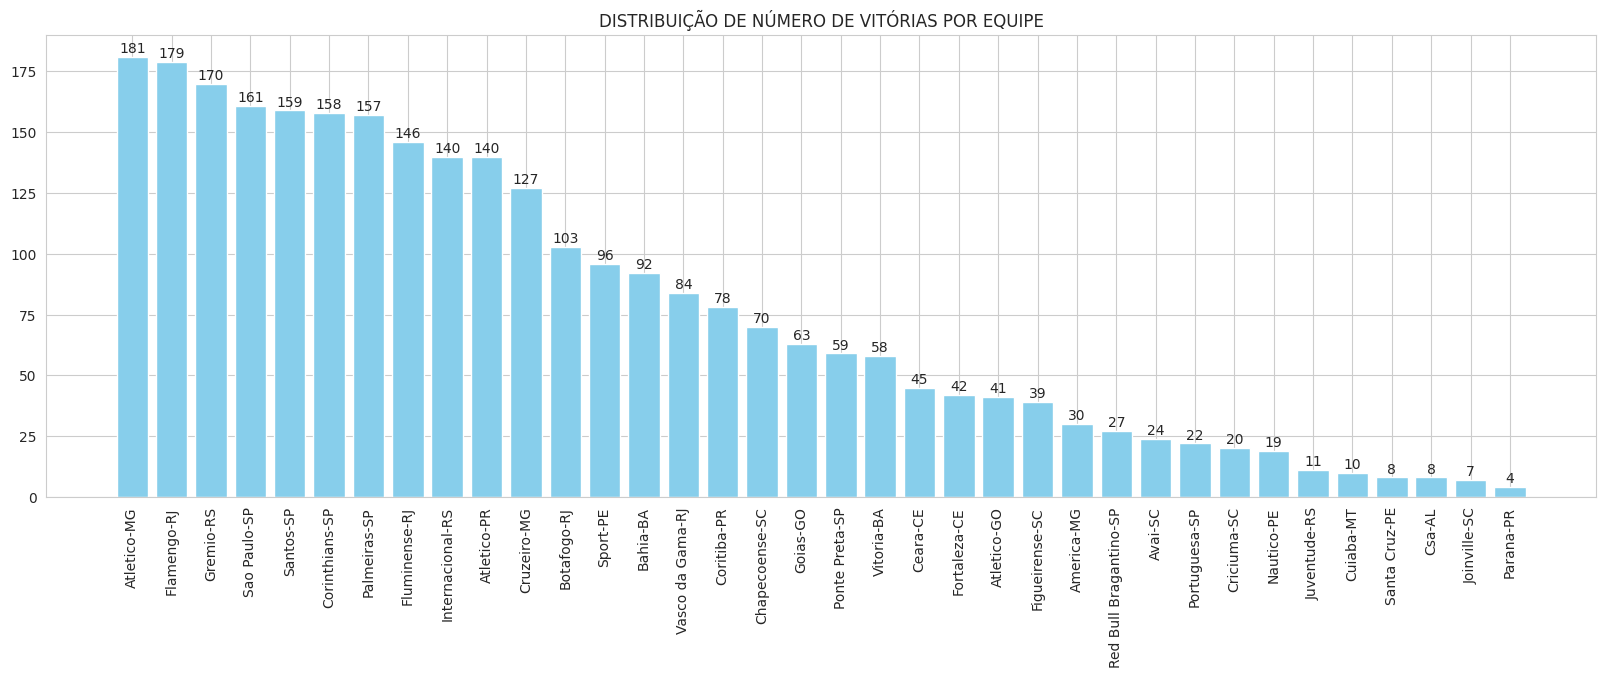

In [192]:
filtered_df = df[df['winner_team'] != 'Draw']
winner_counts = filtered_df['winner_team'].value_counts()

plt.figure(figsize=(20, 6))
bars = plt.bar(winner_counts.index, winner_counts, color='skyblue')
plt.title('DISTRIBUIÇÃO DE NÚMERO DE VITÓRIAS POR EQUIPE')
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

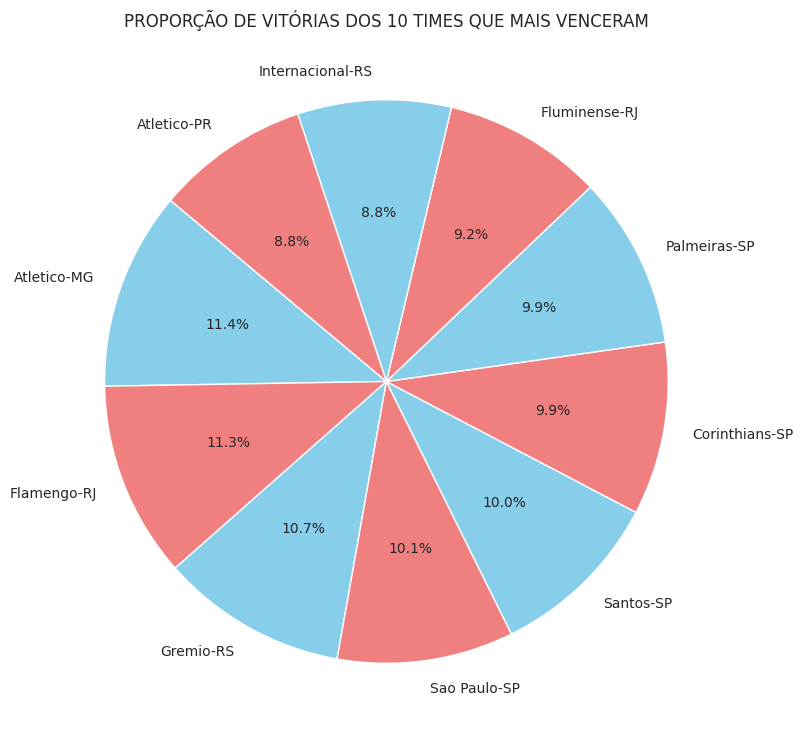

In [193]:
top_10_teams = df[df['winner_team'] != 'Draw']['winner_team'].value_counts().nlargest(10).index
filtered_df = df[df['winner_team'].isin(top_10_teams)]

win_counts = filtered_df['winner_team'].value_counts()

plt.figure(figsize=(8, 9))
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])

plt.title('PROPORÇÃO DE VITÓRIAS DOS 10 TIMES QUE MAIS VENCERAM')
plt.axis('equal')

plt.show()

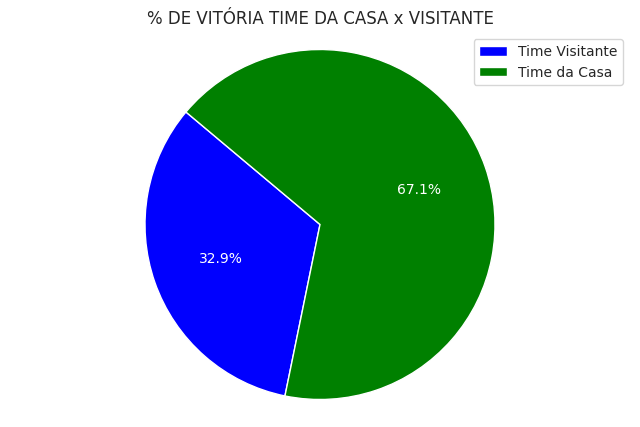

In [194]:
total_matches = len(df)
away_wins = len(df[df['winner_team'] == df['away_team']])
away_win_percentage = (away_wins / total_matches) * 100

home_wins = len(df[df['winner_team'] == df['home_team']])
home_win_percentage = (home_wins / total_matches) * 100

labels = ['Time Visitante', 'Time da Casa']
percentages = [away_win_percentage, home_win_percentage]
colors = ['blue', 'green']

plt.figure(figsize=(8, 5))

plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': 'white'})

plt.axis('equal')

plt.legend(labels, loc="best")

plt.title('% DE VITÓRIA TIME DA CASA x VISITANTE')
plt.show()

<Axes: ylabel='Frequency'>

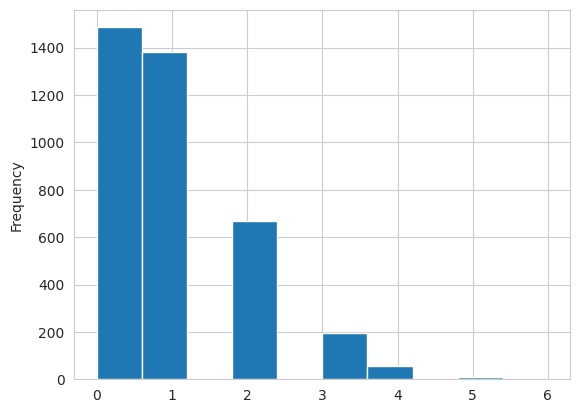

In [195]:
df.away_goal.plot.hist()

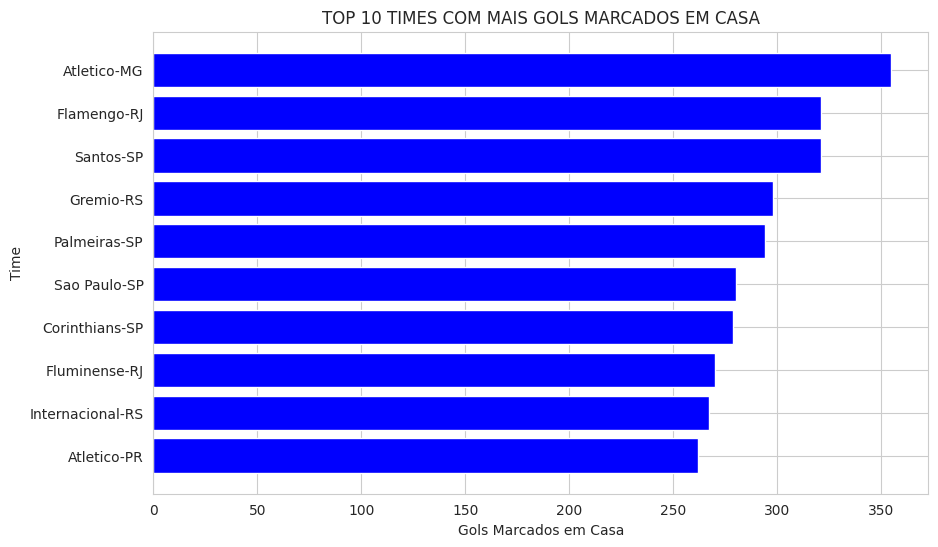

In [196]:
home_goals = df.groupby('home_team')['home_goal'].sum().reset_index()
home_goals = home_goals.rename(columns={'home_goal': 'goals_scored_home'})

top_10_home = home_goals.nlargest(10, 'goals_scored_home')

plt.figure(figsize=(10, 6))
plt.barh(top_10_home['home_team'], top_10_home['goals_scored_home'], color='blue')
plt.xlabel('Gols Marcados em Casa')
plt.ylabel('Time')
plt.title('TOP 10 TIMES COM MAIS GOLS MARCADOS EM CASA')
plt.gca().invert_yaxis()
plt.show()

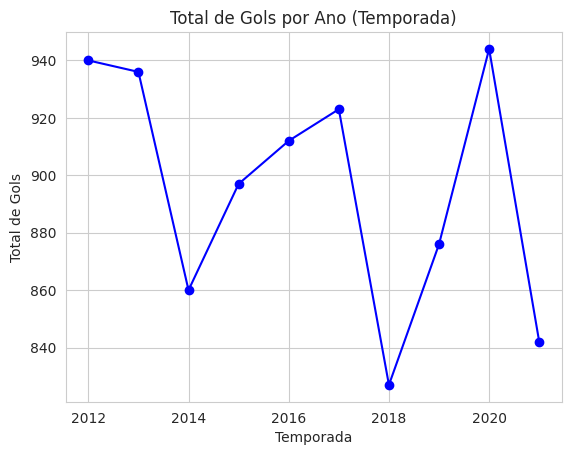

In [206]:
df['season'] = df['season'].astype(str)

grouped = df.groupby('season')[['home_goal', 'away_goal']].sum()
grouped['total_goals'] = grouped['home_goal'] + grouped['away_goal']

if '2021' not in grouped.index:
    grouped.loc['2021'] = [0, 0, 0]

grouped = grouped.sort_index()

grouped['total_goals'].plot(kind='line', marker='o', color='b')
plt.title('Total de Gols por Ano (Temporada)')
plt.xlabel('Temporada')
plt.ylabel('Total de Gols')
plt.grid(True)
plt.show()